In [1]:
import numpy as np

import pandas as pd
import os, json
path = os.getcwd() + '/summaries_part/'
jsons = os.listdir(path)


dict_list = []
for fname in jsons:
    try:
        with open(path + fname) as f:
            dict_summary = json.load(f)
            dict_list.append(dict_summary)
    except:
        continue

df = pd.DataFrame(dict_list)

with open(os.getcwd() + '/summary/all_summary.4.json', 'w', encoding = 'utf-8') as fout:
    json.dump(dict_list, fout)
    
# with open(os.getcwd() + '/summary/all_summary.2.json') as fout:
#     dict_list = json.load(fout)
    
df = pd.DataFrame(dict_list)

In [2]:
measure_cat = {'adele.sparse', 'mrlasso.sparse'}
mtype = 'l2.'
measures = [mtype + _ for _ in measure_cat]
measures += ['eta']
agg_dict = dict()
for key in measures:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['m', 'n', 's', 'outlier.dist'], as_index=False).agg(agg_dict)
result

m     n   s outlier.dist l2.adele.sparse                  \
                                         mean       std count   
0    4   200   5           10        0.558060  0.115525    50   
1    5   100   5           10        0.389176  0.109005    50   
2    5   200   4           10        0.243330  0.065534    50   
3    5   200   5            4        0.150310  0.025346    50   
4    5   200   5            8        0.217093  0.044725    50   
5    5   200   5           10        0.237275  0.056377    50   
6    5   200   5           16        0.348630  0.087917    50   
7    5   200   5           32        0.585994  0.122908    50   
8    5   200   5           64        1.105650  0.309805    50   
9    5   200   8           10        0.268132  0.057289    50   
10   5   200  16           10        0.452222  0.095481    50   
11   5   200  32           10       10.062307  3.931824    50   
12   5   200  64           10       25.483985  0.351945    38   
13   5   400   5           10        0.176033  0.038570    50   
14   5   800   5           10        0.123764  0.026060    50   
15   5  1600   5           10        0.084950  0.019681    50   
16   8   200   5           10        0.534837  0.080565    50   
17  16   200   5           10        0.528188  0.069906    50   
18  32   200   5           10        0.514850  0.060380    50   
19  64   200   5           10        0.519906  0.068029    50   

   l2.mrlasso.sparse                       eta                  
                mean       std count      mean       std count  
0           0.266341  0.055692    50  1.790000  0.049487    50  
1           0.242293  0.066572    50  2.052000  0.014142    50  
2           0.136485  0.035755    50  2.056000  0.023990    50  
3           0.090474  0.015459    50  1.350000  0.000000    50  
4           0.129725  0.025104    50  1.850000  0.000000    50  
5           0.145427  0.032615    50  2.052000  0.014142    50  
6           0.213292  0.048229    50  2.550000  0.000000    50  
7           0.353352  0.075297    50  2.550000  0.000000    50  
8           0.683536  0.178293    50  2.550000  0.000000    50  
9           0.186471  0.035015    50  2.058000  0.027405    50  
10          0.375125  0.079835    50  2.054000  0.019795    50  
11          9.288434  3.565794    50  1.862000  0.194454    50  
12         24.001773  0.050133    38  2.628947  0.456282    38  
13          0.103354  0.022482    50  2.054000  0.019795    50  
14          0.071502  0.014060    50  2.050000  0.000000    50  
15          0.049721  0.012127    50  2.054000  0.019795    50  
16          0.208988  0.039590    50  2.450000  0.000000    50  
17          0.153131  0.022898    50  2.550000  0.000000    50  
18          0.121971  0.017446    50  2.550000  0.000000    50  
19          0.094782  0.014190    50  2.550000  0.000000    50

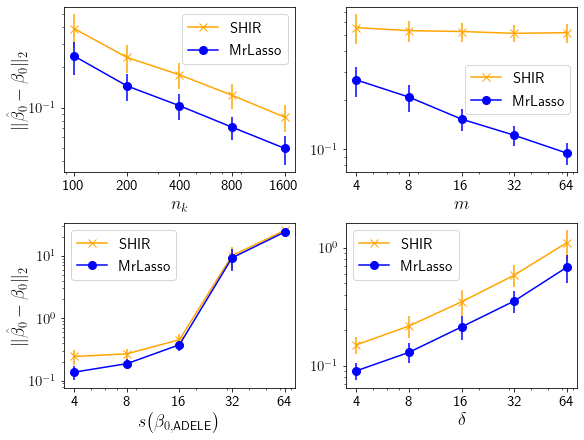

In [3]:
from plot import get_plot
fig, ax = get_plot(result, mtype)
fig.savefig(os.getcwd() + '/plots/' + mtype + 'sim.pdf')

In [4]:
measure_cat = {'adele.sparse', 'mrlasso.sparse'}
mtype = 'error.'
measures = [mtype + _ for _ in measure_cat]
agg_dict = dict()
for key in measures:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['m', 'n', 's', 'outlier.dist'], as_index=False).agg(agg_dict)

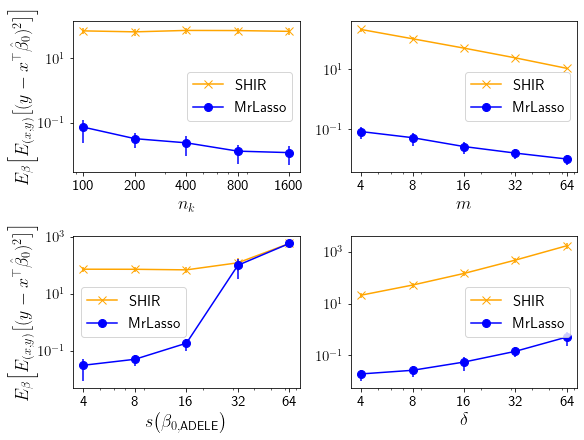

In [5]:
fig, ax = get_plot(result, mtype)
fig.savefig(os.getcwd() + '/plots/' + mtype + 'sim.pdf')